This is My first EDA Notebook , So give a comment if i have done any mistakes in this EDA. 
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## *Hypothesis*
* Are customers with **low annual premium**,   **Interested** in insurance ?  
* Are **vintage customers** intersted in insurance?
* Are **Licensed customers** **interested** in insurance
* Are customers **interested** in insurance  **when vehicle has a damage**
* Are Customers **interested** in insurance when **vehicle age <1 year(new bike)**
* Are **previously insured** customers, **not interested** in insurance


# Exploratory  Data Analysis

In [1]:
# load the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedKFold

In [2]:
# read data
rawdf = pd.read_csv("/kaggle/input/health-insurance-cross-sell-prediction/train.csv")
test  = pd.read_csv("/kaggle/input/health-insurance-cross-sell-prediction/test.csv")

In [3]:
#see the head of data
rawdf.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Varriable Identification and TypeCasting

In [4]:
# get the data types of all features
rawdf.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### Integer Data type

In [5]:
#get integer data types
rawdf.dtypes[rawdf.dtypes=="int64"]

id                    int64
Age                   int64
Driving_License       int64
Previously_Insured    int64
Vintage               int64
Response              int64
dtype: object

In [6]:
# Driving_License, Previously_Insured,Response is a categorical varriable so we convert it into category
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Previously_Insured"] = rawdf["Previously_Insured"].astype("category") 
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Response"] = rawdf["Response"].astype("category")

### Float data type

In [7]:
# get float data types 
rawdf.dtypes[rawdf.dtypes == "float64"]

Region_Code             float64
Annual_Premium          float64
Policy_Sales_Channel    float64
dtype: object

In [8]:
#Region code , Policy Sales Channel are categorical varriables
rawdf["Region_Code"] = rawdf["Region_Code"].astype("category")
rawdf["Policy_Sales_Channel"] = rawdf["Policy_Sales_Channel"].astype("category")

### Object data type

In [9]:
#vehicle age and vehicle damage is object varriable
rawdf.dtypes[rawdf.dtypes=="object"]

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

In [10]:
# gender, vehicle age , vehicle damage are categorical varriables
rawdf["Gender"] = rawdf["Gender"].astype("category")
rawdf["Vehicle_Age"] = rawdf["Vehicle_Age"].astype("category")
rawdf["Vehicle_Damage"] = rawdf["Vehicle_Damage"].astype("category")

In [11]:
# check all features data types after conversion
rawdf.dtypes

id                         int64
Gender                  category
Age                        int64
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel    category
Vintage                    int64
Response                category
dtype: object

# Univariate Analysis

In [12]:
# describe of all numeric values
rawdf.describe()

,id,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,30564.389581,154.347397
std,110016.836208,15.511611,17213.155057,83.671304
min,1.000000,20.000000,2630.000000,10.000000
25%,95278.000000,25.000000,24405.000000,82.000000
50%,190555.000000,36.000000,31669.000000,154.000000
75%,285832.000000,49.000000,39400.000000,227.000000
max,381109.000000,85.000000,540165.000000,299.000000


### Univariate Analysis Integer

In [13]:
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [14]:
# get numeric varriables
rawdf.select_dtypes(include=['int64','float64','Int64']).dtypes

id                  int64
Age                 int64
Annual_Premium    float64
Vintage             int64
dtype: object

In [15]:
#Segregating varriables into groups
customer_details = ["Age","Vintage"]

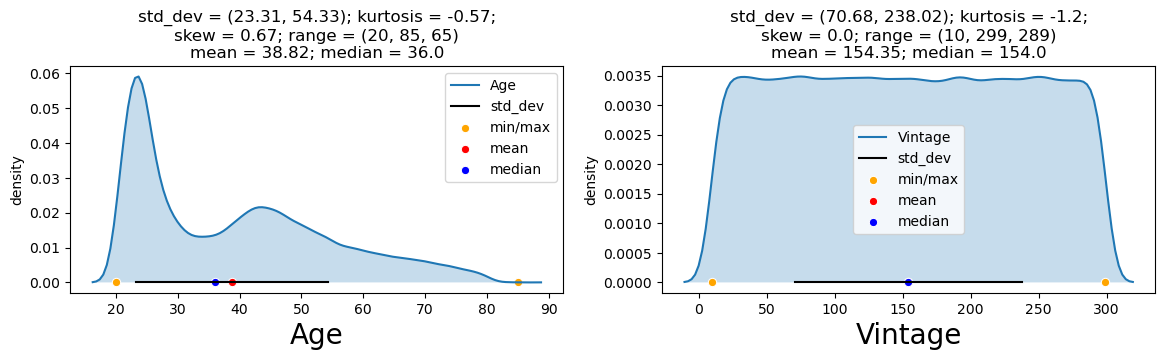

In [16]:
UVA_numeric(rawdf,customer_details)

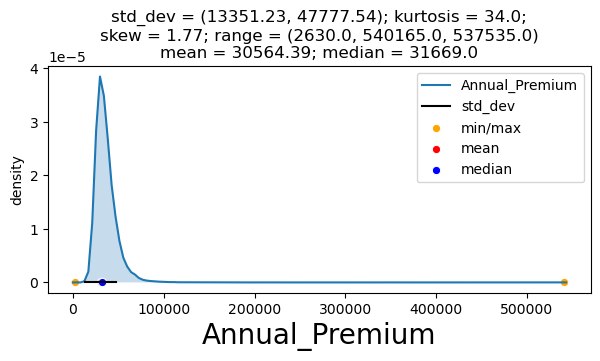

In [17]:
UVA_numeric(rawdf,["Annual_Premium"])

#### summary
* Most of the customers Age between 20 to 30 and 40 to 50 some peak there.
* vintage is normaly distributed. Average vintage value is 150
* Annual Premium is Highly skewed and also more kurtosis value so it has a extreme outliers 

### Univariate Analysis - Category

In [18]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    n_uni = data[i].nunique()
    if n_uni > 20:
        norm_count1 = data[i].value_counts(normalize = True)
        norm_count = norm_count1.sort_values().tail(20) 
    else:
        norm_count = data[i].value_counts(normalize = True)
    

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [19]:
rawdf.select_dtypes(include=["category"]).dtypes

Gender                  category
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Policy_Sales_Channel    category
Response                category
dtype: object

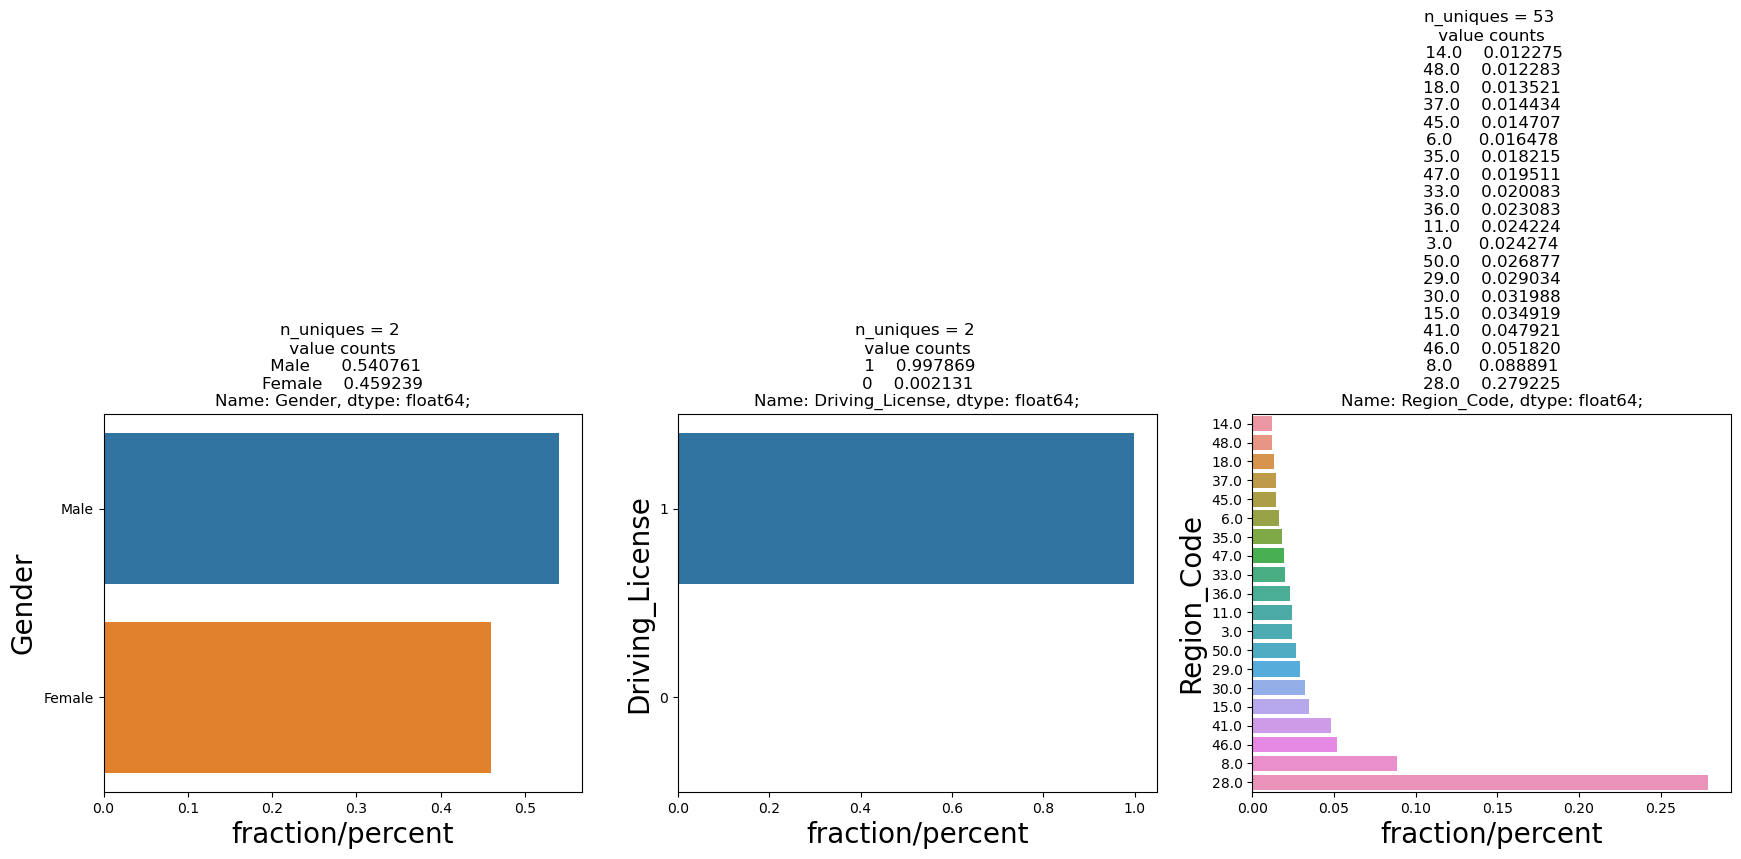

In [20]:
# top 53 region code are taken
UVA_category(rawdf,["Gender","Driving_License","Region_Code"])

### summary
* Male customers higher than Female
* 99 % customers has a License
* Region Code 28 has a high number of customers
* Region Code 8, 46, 41 has a second high number of customers

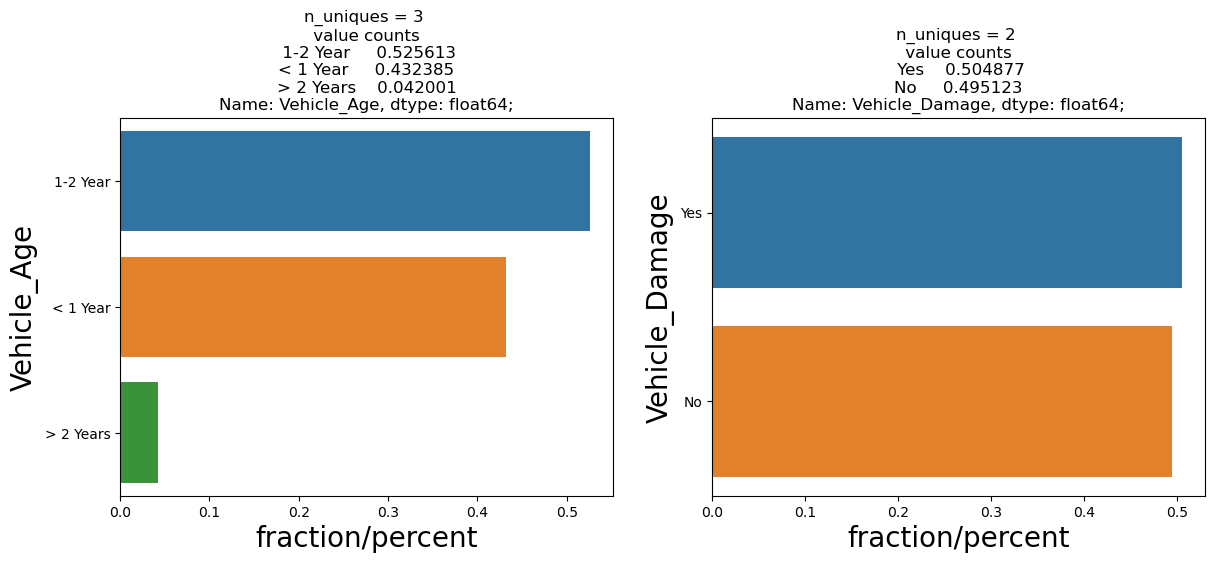

In [21]:
UVA_category(rawdf,["Vehicle_Age","Vehicle_Damage"])

### summary
* 95% Vechicle's age "within 2 years"
* Vehicle Damage is equally splitted

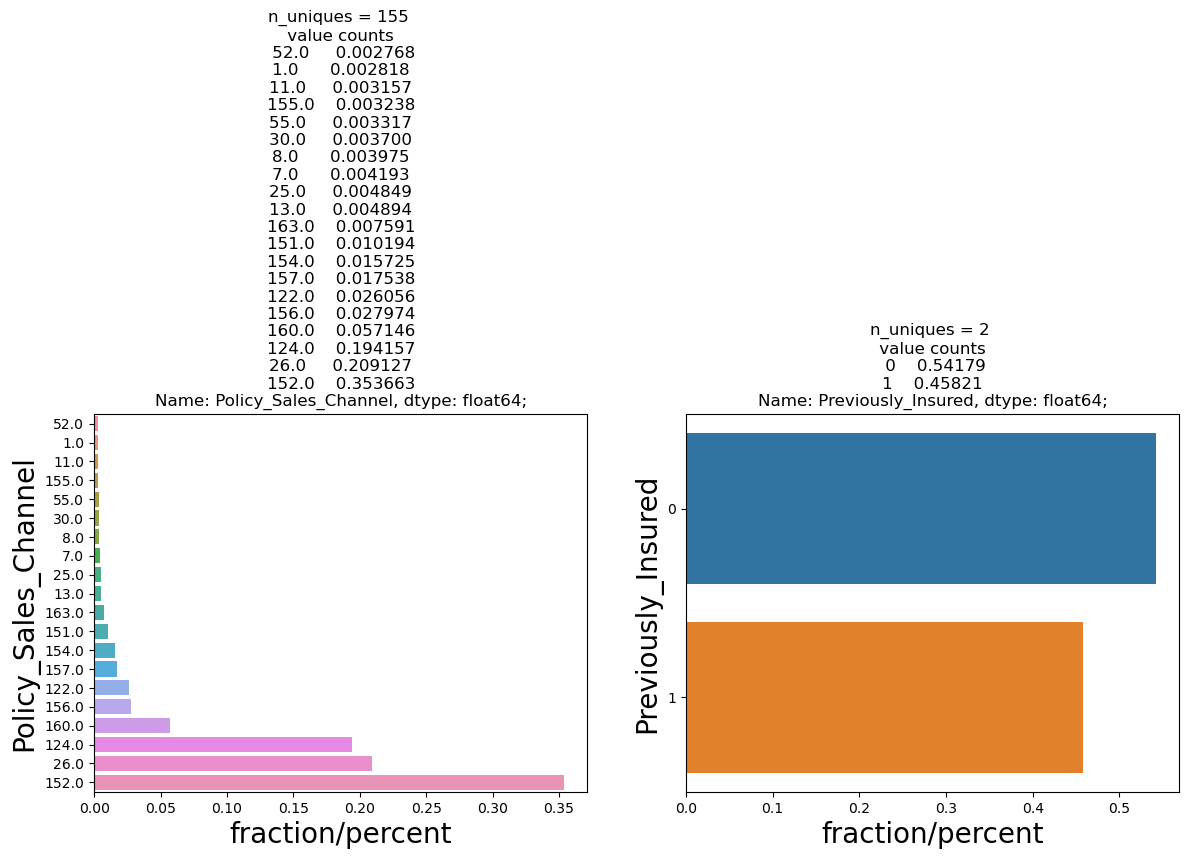

In [22]:
UVA_category(rawdf,["Policy_Sales_Channel","Previously_Insured"])

### summary
* Most used ploicy sales channel code(152,26,124,160,156,122,157,154)
* Previously Insured people was less

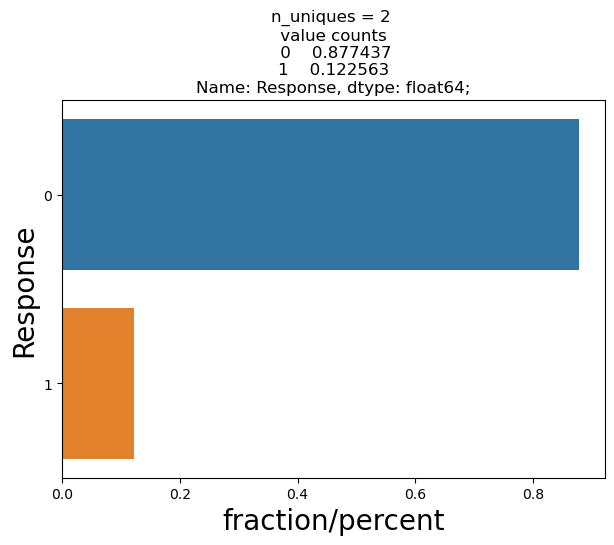

In [23]:
UVA_category(rawdf,["Response"])

#### summary
* Most of the customers not interested in insurance
* 99% customers are licensed  and 87% customers are not interested in insurance. so hyposthesis " **licensed customer** **interested** in insurance" is false   
* Imbalanced target Varriable 

# Univariate - Missing Values and Outlier Analysis

In [24]:
rawdf.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [25]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

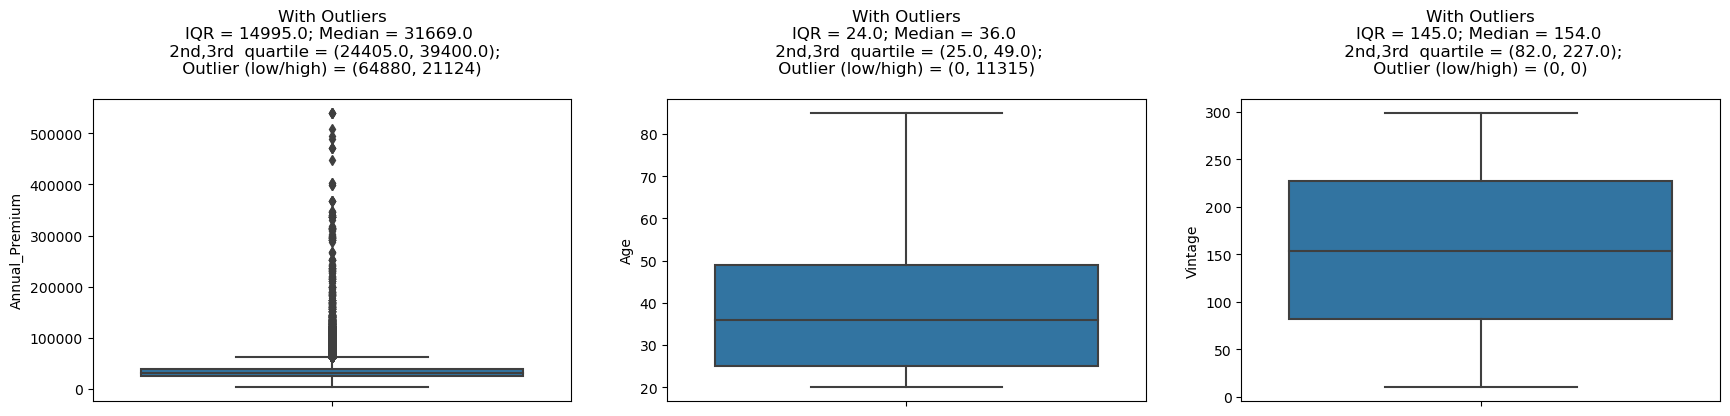

In [26]:
UVA_outlier(rawdf,["Annual_Premium","Age","Vintage"] )

### summary
* Annual premium has a extreme outlier

# Bivariate Analysis

In [27]:
numerical_data = rawdf.select_dtypes(include=["int64","Int64","float64"])
numerical_data.corr()

,id,Age,Annual_Premium,Vintage
id,1.000000,0.001561,0.003027,-0.000630
Age,0.001561,1.000000,0.067507,-0.001264
Annual_Premium,0.003027,0.067507,1.000000,-0.000608
Vintage,-0.000630,-0.001264,-0.000608,1.000000


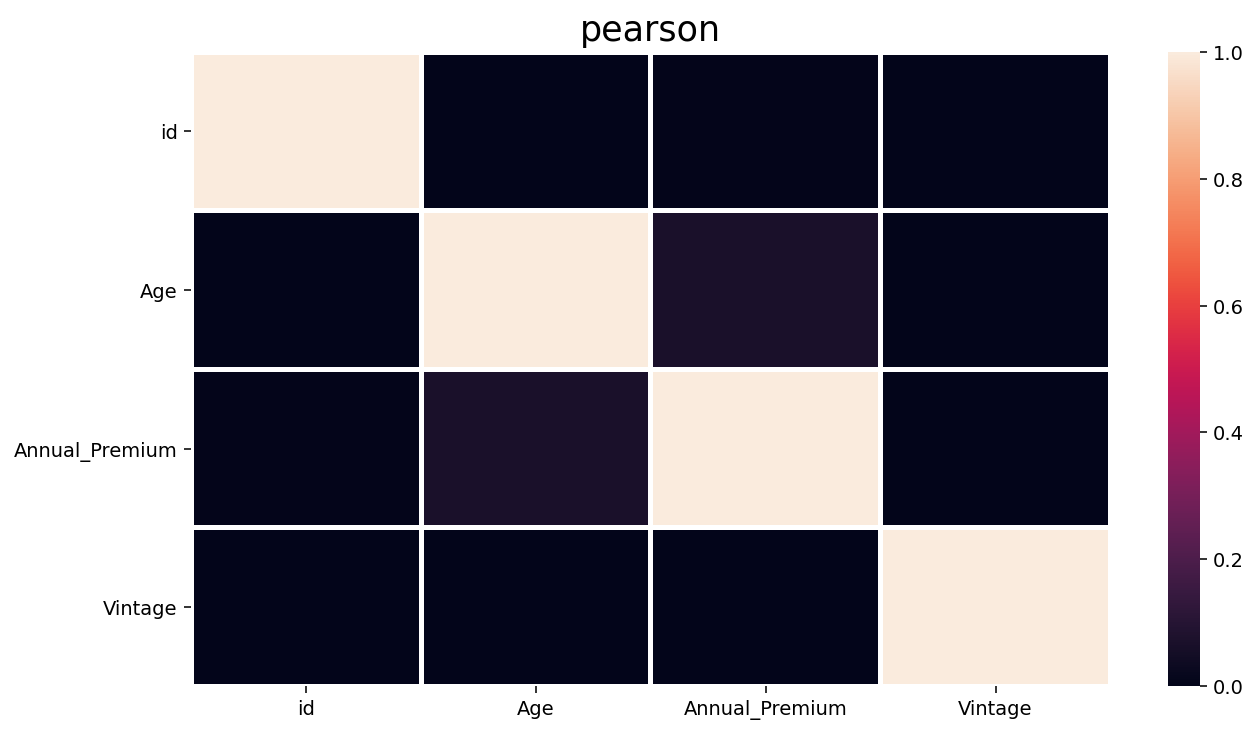

In [28]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = numerical_data.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

### summary

* Features dont have a strong correlation



### ScatterPlot

<Figure size 840x560 with 0 Axes>

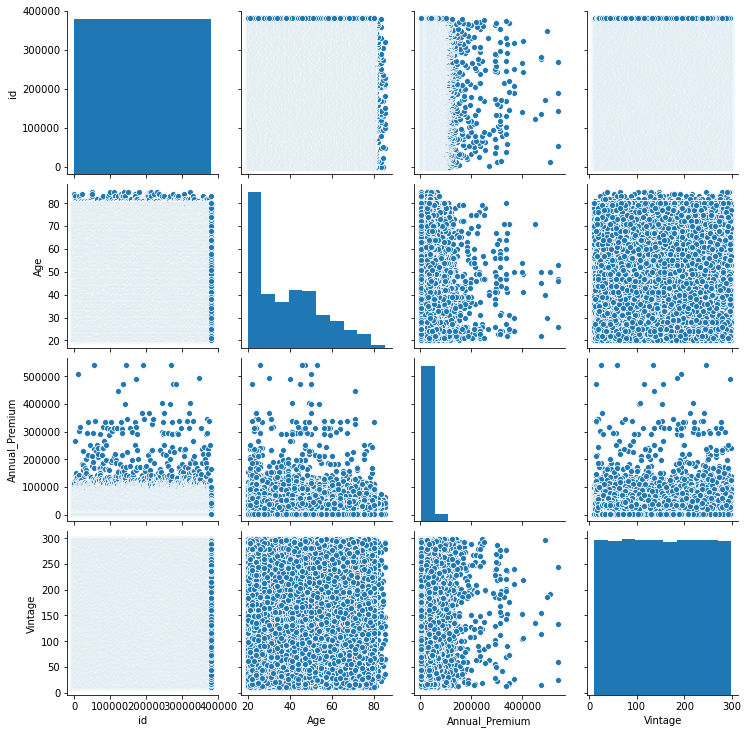

In [29]:
# scatter plot for all numerical varriables
plt.figure(dpi=140)
sns.pairplot(numerical_data)

## Bivariate Analysis: Continuous-Categorical variables

In [30]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [31]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [32]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### Are **vintage customers** interested in insurance?

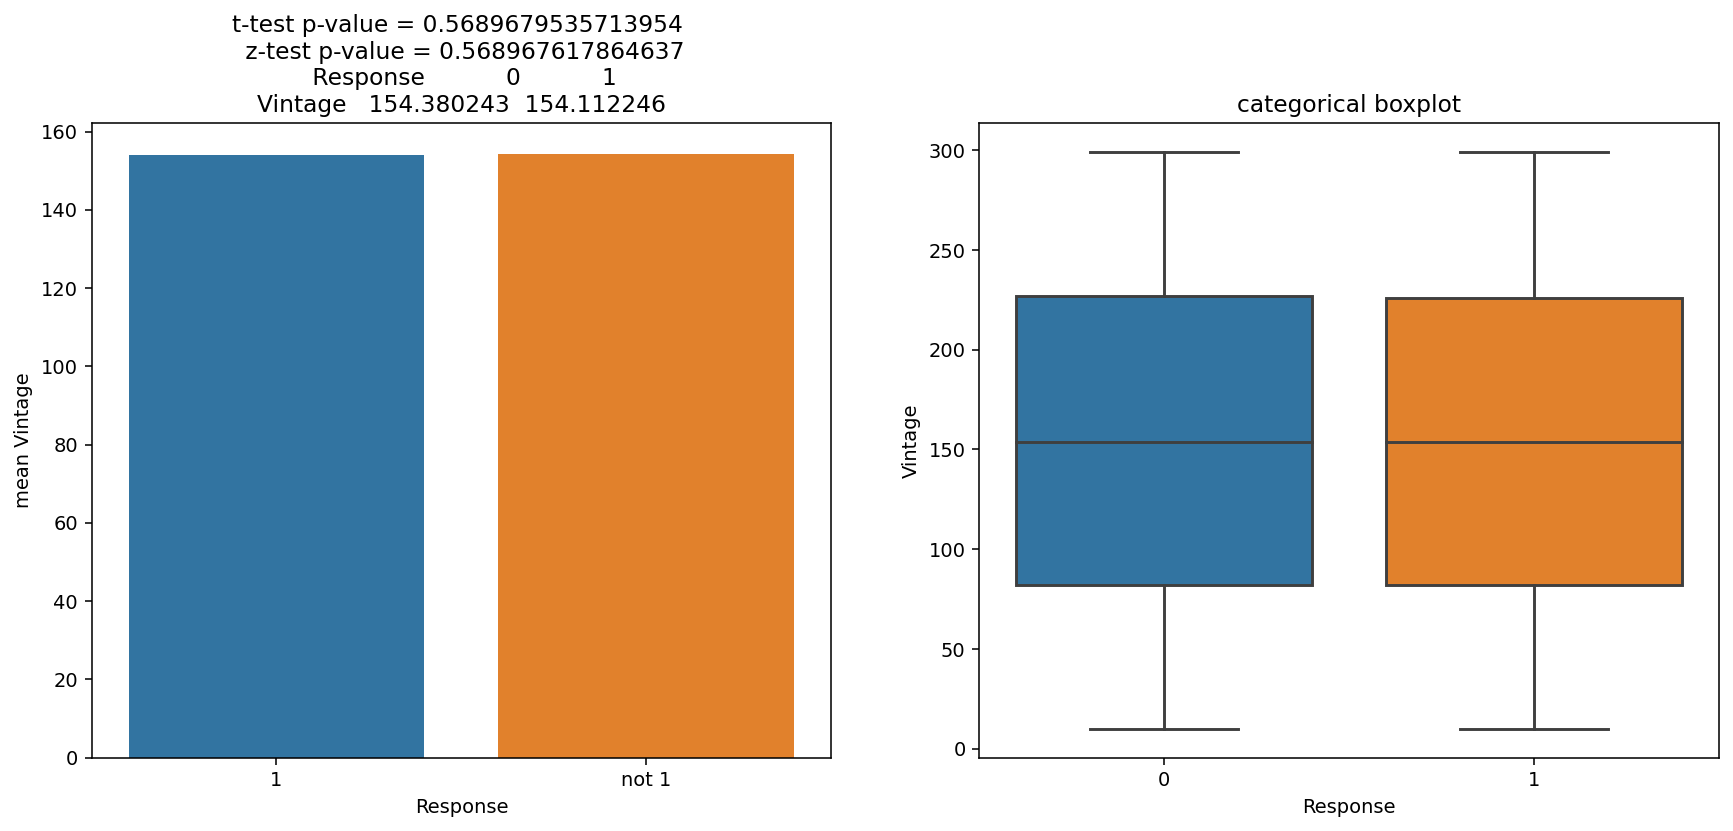

In [33]:
Bivariate_cont_cat(rawdf, 'Vintage', 'Response', 1)

### summary
* No significant difference in vintage customers . so reject this hypothesis 
* both interested and no interested customers mean vintage is approxiamately same. no significant difference is there.so vintage has no impact on customer interest
* No outliers 

### Are aged customers interested in insurance?

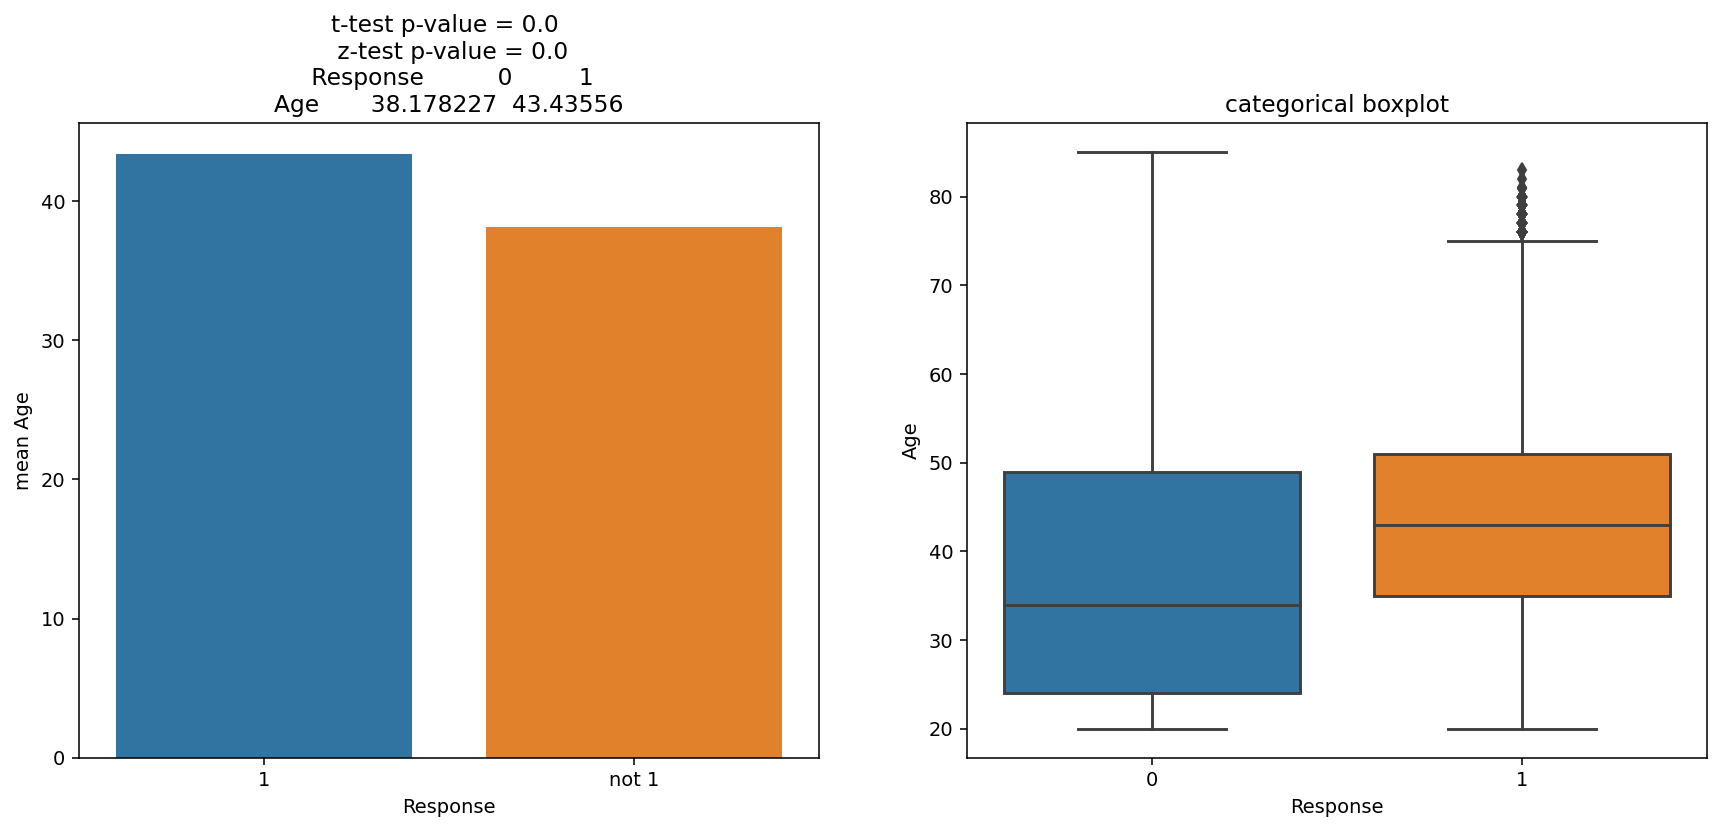

In [34]:
Bivariate_cont_cat(rawdf, 'Age', 'Response', 1)

 ### Inference
 * Interested Customers age between 35 to 52.
 * Uninterested Customers age between 25 to 48.
 * p-value of z and t tests  is 0 , so significant difference there. It indicates age makes a impact on customer interest
 
 

### Are customers with **low annual premium**,   **Interested** in insurance ?

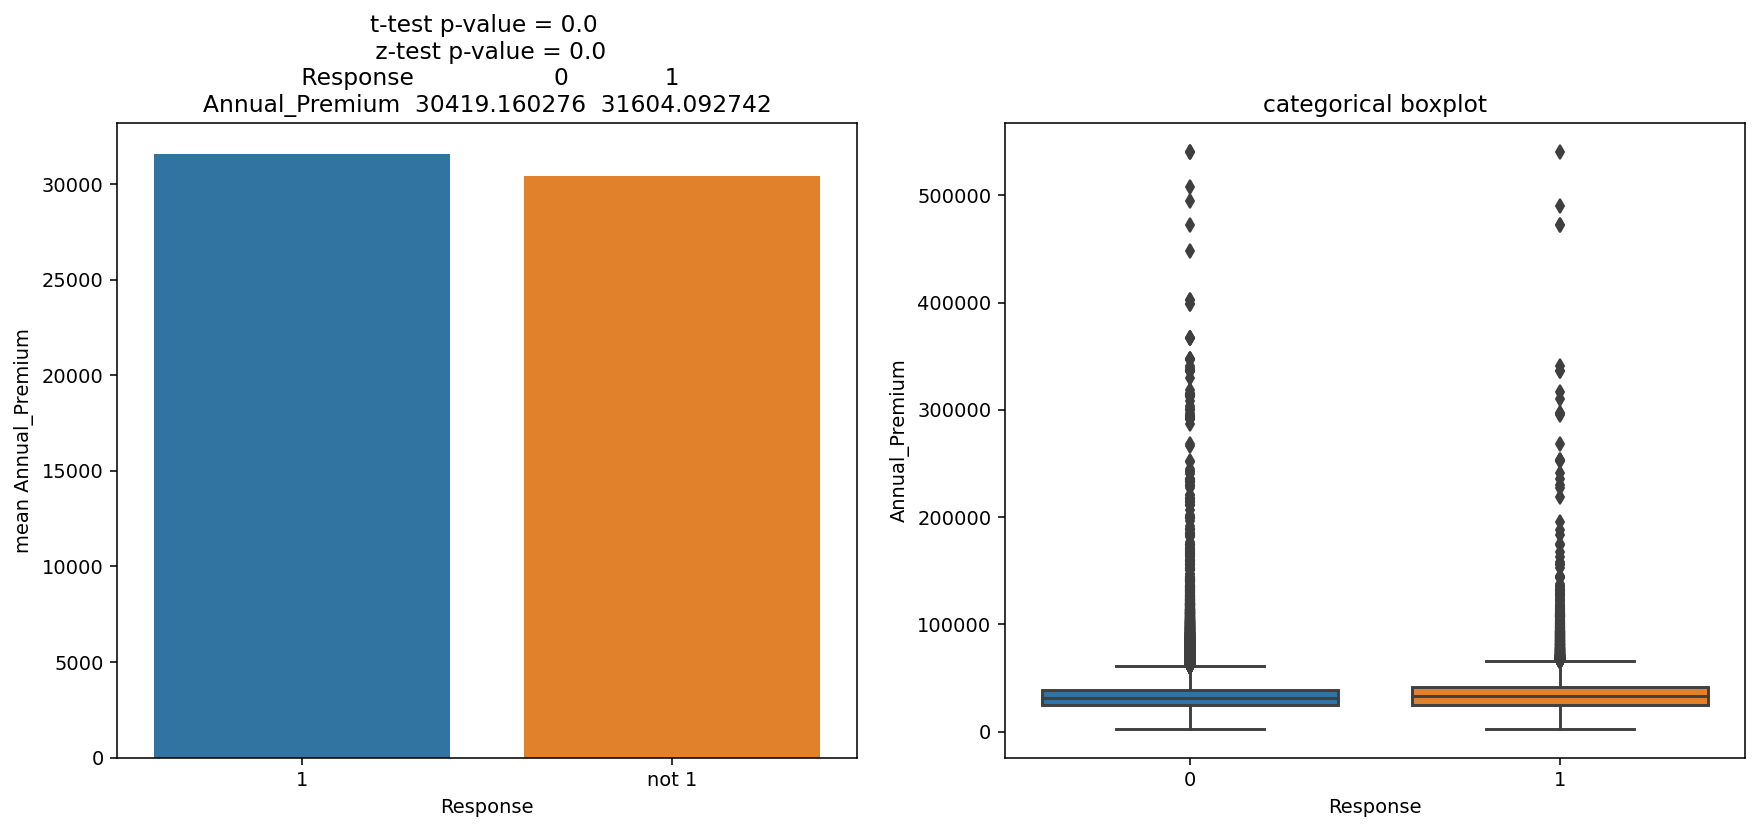

In [35]:
Bivariate_cont_cat(rawdf, 'Annual_Premium', 'Response', 1)

### Inference
* Annual premium mean for interested customer is 30419
* Annual premium mean for not interested customer is 31604
* Annual Premium makes impact on customer interest


## Bivariate Analysis(categorical categorical)

In [36]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
#   sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### Are licensed customer has a more interest?

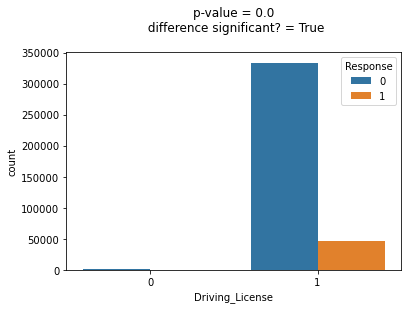

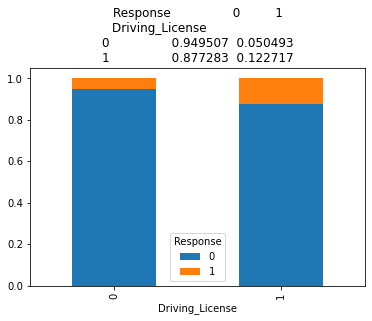

In [37]:
BVA_categorical_plot(rawdf, "Response","Driving_License")

### Inference
* significant differnece is there.But 99%(univariate analysis) customers has a license, In that only 1 % customers are interested others are not interested  

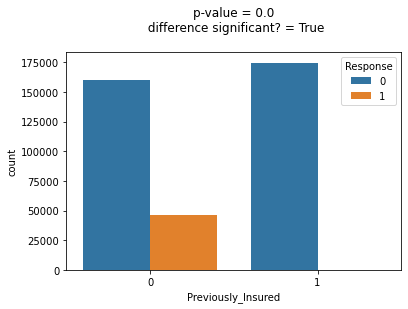

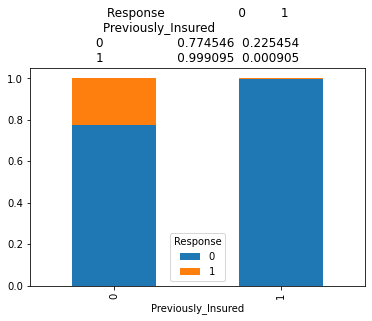

In [38]:
BVA_categorical_plot(rawdf, "Response","Previously_Insured")

### Inference
* Previously Insured customers not interested in insurance

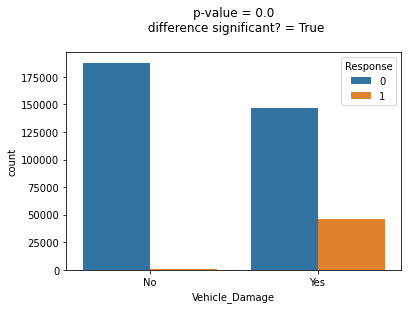

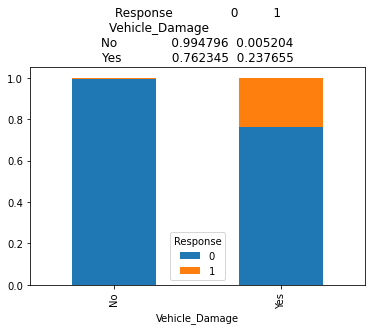

In [39]:
BVA_categorical_plot(rawdf, "Response","Vehicle_Damage")

### Inference
* Vehicle damaged customers has a interest in insurance 

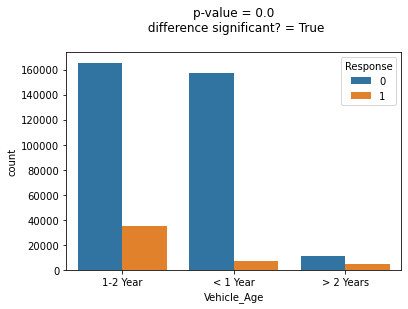

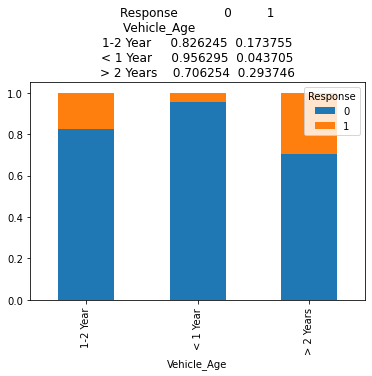

In [40]:
BVA_categorical_plot(rawdf, "Response","Vehicle_Age")

### Inference
* Overall vehicle Age 1-2 year category , interested customer's count is high.but
* In >2 year Age category, Interested customers percentage is high when compared to other category   

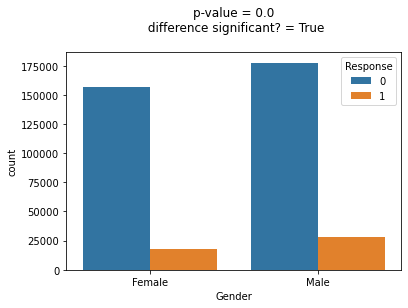

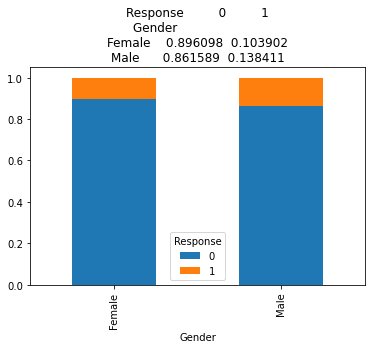

In [41]:
BVA_categorical_plot(rawdf, "Response","Gender")

* Male customers has more interest in insurance. 

### Bivariate Analysis - Policy_Sales_Channel vs Response

In [42]:
# Sales Channel wise Total Customers Count
psc_total = rawdf.groupby("Policy_Sales_Channel")["Response"].count()\
                          .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
psc_total

,Policy_Sales_Channel,count
145,152.0,134784
24,26.0,79700
119,124.0,73995
153,160.0,21779
149,156.0,10661
...,...,...
142,149.0,1
80,84.0,1
118,123.0,1
137,144.0,1


### summary
* In univarite Analysis, Already we have seen Policy sales channel 152 has a more entry

In [43]:
# filter interested customers count 
FormattedData = rawdf[rawdf["Response"]==1].groupby("Policy_Sales_Channel")["Response"].count()\
                          .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 

FormattedData["total_count"] = psc_total["count"]
FormattedData["success_rate"] = (FormattedData["count"]/FormattedData["total_count"])*100 
FormattedData[FormattedData["total_count"]>500].sort_values("success_rate",ascending=False).head(50)

,Policy_Sales_Channel,count,total_count,success_rate
148,155.0,395,1234,32.009724
154,163.0,880,2893,30.418251
2,3.0,159,523,30.401530
150,157.0,1794,6684,26.840215
29,31.0,160,631,25.356577
147,154.0,1474,5993,24.595361
149,156.0,2297,10661,21.545821
3,4.0,102,509,20.039293
23,25.0,369,1848,19.967532
24,26.0,15891,79700,19.938519


### summary
* policy sales channel 155 has high success rate(32%) when compared to other channels.
* policy sales channel 26 has a more intersted customers. but success rate is 19%


### Bivariate Analysis(Region_code vs Response)

In [44]:
# Sales Channel wise Total Customers Count
psc_total = rawdf.groupby("Region_Code")["Response"].count()\
                          .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
psc_total.head(25)

,Region_Code,count
28,28.0,106415
8,8.0,33877
46,46.0,19749
41,41.0,18263
15,15.0,13308
30,30.0,12191
29,29.0,11065
50,50.0,10243
3,3.0,9251
11,11.0,9232


In [45]:
# filter interested customers count 
FormattedData = rawdf[rawdf["Response"]==1].groupby("Region_Code")["Response"].count()\
                          .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 

FormattedData["total_count"] = psc_total["count"]
FormattedData["success_rate"] = (FormattedData["count"]/FormattedData["total_count"])*100 
FormattedData[FormattedData["total_count"]>500].sort_values("success_rate",ascending=False).head(25)

,Region_Code,count,total_count,success_rate
38,38.0,389,2026,19.200395
28,28.0,19917,106415,18.716346
19,19.0,250,1535,16.286645
4,4.0,285,1801,15.824542
23,23.0,300,1960,15.306122
24,24.0,342,2415,14.161491
7,7.0,432,3279,13.174748
18,18.0,678,5153,13.157384
3,3.0,1181,9251,12.766187
35,35.0,865,6942,12.460386


In [46]:
FormattedData[FormattedData["total_count"]>10000].sort_values("success_rate",ascending=False)

,Region_Code,count,total_count,success_rate
28,28.0,19917,106415,18.716346
29,29.0,1365,11065,12.336195
41,41.0,2224,18263,12.177627
46,46.0,2032,19749,10.289129
8,8.0,3257,33877,9.614193
30,30.0,900,12191,7.382495
15,15.0,958,13308,7.198677
50,50.0,642,10243,6.267695


In [47]:
# average success rate is less
FormattedData["success_rate"].mean()

10.081178541627693

### summary
*  High total customers and succes rate place code is 28
*  low success rate and high customers count, places(50,15,30,8,9) 
* Region code affects the customer interest but average success rate of all region is less.

# Feature Engineering and Modeling

In [48]:
train = rawdf
trainY = rawdf["Response"]

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  category
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  category
 4   Region_Code           381109 non-null  category
 5   Previously_Insured    381109 non-null  category
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  category
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  category
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 14.9 MB


In [50]:
import pandas as pd
num_feature = ["Age","Vintage","Annual_Premium"]
cat_feature = ["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel"]
train["Age_Cat"]= pd.cut(train["Age"],bins=[10,20,30,40,50,60,70,80,90,100],labels=[1,2,3,4,5,6,7,8,9])
train["Policy_Sales_Channel"] = train["Policy_Sales_Channel"].astype("int")
train["Region_Code"] = train["Region_Code"].astype("int")

ohe = OneHotEncoder(sparse=False)        
transformed_train_data = ohe.fit_transform(train[["Age_Cat","Gender","Vehicle_Age","Previously_Insured","Driving_License","Vehicle_Damage"]])

# # the above transformed_data is an array so convert it to dataframe
encoded_train_data = pd.DataFrame(transformed_train_data, index=train.index)        
train_data = pd.concat([train, encoded_train_data], axis=1)

In [51]:
trainX = train_data.drop(["id","Age","Age_Cat","Gender","Vehicle_Age","Driving_License","Previously_Insured","Vehicle_Damage","Response"], axis=1)
trainX.columns

Index([         'Region_Code',       'Annual_Premium', 'Policy_Sales_Channel',
                    'Vintage',                      0,                      1,
                            2,                      3,                      4,
                            5,                      6,                      7,
                            8,                      9,                     10,
                           11,                     12,                     13,
                           14,                     15,                     16,
                           17,                     18],
      dtype='object')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix
logreg = LogisticRegression(random_state=0)
models = {
    "Logistic Regression":logreg,
#     "RandomForestClassifier":rf
}
features = ["Gender","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage"]
skf = StratifiedKFold(n_splits=5, shuffle=True)
for model_name,model in models.items():
    scores = []
    train_scores = []
    for train_indx,val_indx in skf.split(X=trainX,y=trainY):
        #get train and test data     
        X_train,X_val = trainX.loc[train_indx],trainX.loc[val_indx]
        Y_train,Y_val = trainY[train_indx],trainY[val_indx]
        sc = StandardScaler()
        train_sc = sc.fit_transform(X_train)
        val_sc  = sc.fit_transform(X_val)
        #train a model
        model.fit(train_sc,Y_train)
        #make a prediction
        Y_predict = model.predict_proba(val_sc)
        accuracy = roc_auc_score(Y_val,Y_predict[:,1])
        Ytrain_predict = model.predict_proba(train_sc)
        train_accuracy = roc_auc_score(Y_train,Ytrain_predict[:,1])        
        print("train",train_accuracy)
        print("test",accuracy)
        scores.append(accuracy)
        train_scores.append(train_accuracy)
    print("Mean Accurracy of test {0} is {1}".format(model_name,np.mean(scores)))
    print("Mean Accurracy of train {0} is {1}".format(model_name,np.mean(train_scores)))
    

train 0.8426056683729894
test 0.8404745477605894
train 0.8427199113444765
test 0.8408182112039162
train 0.8420632915763286
test 0.8431658432899115
train 0.8418756047010754
test 0.8435584461451038
train 0.8421042470713018
test 0.8427755151224212
Mean Accurracy of test Logistic Regression is 0.8421585127043884
Mean Accurracy of train Logistic Regression is 0.8422737446132343


In [53]:

test["Age_Cat"]= pd.cut(test["Age"],bins=[10,20,30,40,50,60,70,80,90,100],labels=[1,2,3,4,5,6,7,8,9])
test["Policy_Sales_Channel"] = test["Policy_Sales_Channel"].astype("int")
test["Region_Code"] = test["Region_Code"].astype("int")

ohe = OneHotEncoder(sparse=False)        
transformed_test_data = ohe.fit_transform(test[["Age_Cat","Gender","Vehicle_Age","Previously_Insured","Driving_License","Vehicle_Damage"]])

# # the above transformed_data is an array so convert it to dataframe
encoded_test_data = pd.DataFrame(transformed_test_data, index=test.index)        
test_data = pd.concat([test, encoded_test_data], axis=1)
testX = test_data.drop(["id","Age","Age_Cat","Gender","Vehicle_Age","Previously_Insured","Driving_License","Vehicle_Damage"],axis=1)
sc = StandardScaler()
testt = sc.fit_transform(testX)
#predict
predictions = logreg.predict(testt)
output = pd.DataFrame({'id': test.id, 'Response': predictions})
print(output["Response"].value_counts())
output.to_csv('submission.csv', index=False)

0    127034
1         3
Name: Response, dtype: int64
